## Daniel's Speed Dating

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML

# from ../project_common import ProjectCommon
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from project_common import ProjectCommon

### General Notes on Missing Values


Waves 6-9 has:
- Different rating system (rate between 1-10 compared to distributing 100 points). ALREADY COMPLETED IN SPREADSHEET


- Waves 1-5 do not have starting position positin1
- columns ending in 3_s (half way questionaire) are half empty and sporadic. maybe ignore
- satis_2	length	numdat_2 have 915 missing values
- columns ending in 7_2 have 6393 missing values (every value missing before wave 15)
- some people's ratings do not add to 100 (especially those that are ratings out of 10)


## Analysis

In [205]:
df = pd.read_csv('../data/Speed Dating Data.csv')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [206]:
pc = ProjectCommon

In [207]:
# cols = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
# df_ratings =df[cols]
# df_ratings['Total'] = df_ratings.sum(axis=1)
# df[cols] = (df_ratings[cols].div(df_ratings['Total'], axis=0) * 100).round(2)


### How does age difference effect future “date" selection

#### First we will look at the age of the participants

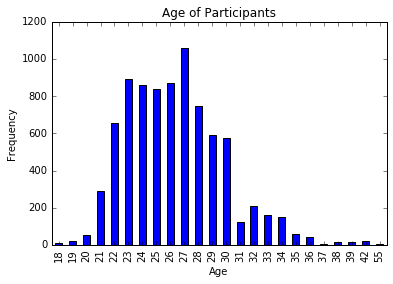

In [208]:

ax = df['age'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age of Participants')
# df['age'].unique()

#### Let's now compare the age difference in the date to the likelihood of getting a match

In [209]:
# print sum(df['age_o'].isnull())
# print sum(df['age'].isnull())
age_cols = ['iid', 'pid', 'age', 'age_o', 'dec_o', 'match']
age_df = df[age_cols]
age_df = age_df.dropna(how='any')
# age_df.head(30)
age_df['age_diff'] = (age_df['age'] - age_df['age_o']).abs().astype(int)

age_df.head()

,iid,pid,age,age_o,dec_o,match,age_diff
0,1,11.0,21.0,27.0,0,0,6
1,1,12.0,21.0,22.0,0,0,1
2,1,13.0,21.0,22.0,1,1,1
3,1,14.0,21.0,23.0,1,1,2
4,1,15.0,21.0,24.0,1,1,3


In [210]:
age_matches = age_df[['match', 'age_diff']].groupby('age_diff')

count_df = age_matches.count()
mean_df = age_matches.mean()
mean_df['NumberOfDates'] = count_df['match']
mean_df['match'] = mean_df['match'].round(3)
summary_df = mean_df.rename(columns={'match': '% Matched'})
summary_df

,% Matched,NumberOfDates
age_diff,,
0,0.204,678
1,0.182,1548
2,0.190,1286
3,0.164,1120
4,0.161,970
5,0.150,758
6,0.133,588
7,0.144,416
8,0.104,268


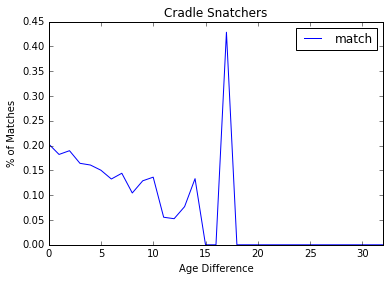

In [211]:
ax = age_matches.mean().plot(kind='line')
ax.set_xlabel('Age Difference')
ax.set_ylabel('% of Matches')
ax.set_title('Cradle Snatchers')
# age_df.head()

#### What's going on with that 17 year age difference? There are only 14 dates with that age difference but 43% of those are matches

In [212]:
sub_df = age_df[age_df['age_diff'] == 17]
sub_df

,iid,pid,age,age_o,dec_o,match,age_diff
1030,77,98.0,22.0,39.0,1,1,17
1192,86,98.0,22.0,39.0,1,0,17
1405,98,77.0,39.0,22.0,1,1,17
1414,98,86.0,39.0,22.0,0,0,17
2664,196,230.0,25.0,42.0,1,0,17
2744,200,230.0,25.0,42.0,0,0,17
2764,201,230.0,25.0,42.0,1,1,17
2904,208,230.0,25.0,42.0,1,1,17
3004,213,230.0,25.0,42.0,1,0,17
3330,230,196.0,42.0,25.0,0,0,17


#### WOAH! There is a 42 year old (iid: 230) who is veryyyy popular with the youngins. Let's have a look at him/her :)

In [213]:
mz_popular = df[df['iid'] == 230]
# let's get the interesting info
info = ['iid', 'gender', 'race', 'goal', 'date', 'go_out', 'career', 'income', 'exphappy', 'expnum']
print "General Info for the popular oldie\n"
mz_popular[info].iloc[0]


General Info for the popular oldie



iid                230
gender               1
race                 2
goal                 2
date                 7
go_out               3
career      consulting
income       39,123.00
exphappy             5
expnum             NaN
Name: 3328, dtype: object

#### Male. Caucasian. Here to 'meet new people'. 'Almost Never goes on dates'. Goes out 'Once a Week'. Consultant. Expected number of people interested in dating you? NAN. 
#### NAN!? Ahhhhhh, one of these people...

<img src="../pics/expectations.png" alt="Drawing" style="width: 350px;"/>

#### What is this mysterious consultant interested in?

In [214]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
        'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
print "Interests for the popular oldie\n"
print mz_popular[interests].iloc[0]

Interests for the popular oldie

sports       1.0
tvsports     1.0
exercise     2.0
dining       1.0
museums     10.0
art         10.0
hiking      10.0
gaming       1.0
clubbing     1.0
reading     10.0
tv          10.0
theater     10.0
movies      10.0
concerts     5.0
music       10.0
shopping    10.0
yoga         6.0
Name: 3328, dtype: float64


#### So he is one of those "all or nothing" guys,  except when it comes to concerts and yoga. My guess: Concerts - loves the music, can't handle a mosh pit like he used to. Yoga - loves the eye candy, can't bend over to touch his toes' 
#### What do his dates think of him?

In [215]:
print "\nAttributes (as rated by dates)\n"
print mz_popular[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']].mean()


Attributes (as rated by dates)

attr_o     5.700000
sinc_o     7.000000
intel_o    6.666667
fun_o      6.450000
amb_o      6.947368
shar_o     5.647059
dtype: float64


#### Somewhat of an all rounder. Can't find anyone who shares his love for museums though.
#### So where do all these matches come from? Maybe it is a case of...

<img src="../pics/lottery2.png" alt="Drawing" style="width: 350px;"/>

In [216]:
mr_pop_pard = df[df['pid'] == 230]
says_yes = mr_pop_pard['dec_o'].mean() * 100
pard_yes = mz_popular['dec_o'].mean() * 100

HTML("<h4>Percentage of time our artsy consultant says yes: %s%%</h4>"
     "<h4>Percentage of time his partner says yes: %s%%</h4>" % (says_yes, pard_yes))


<img src="../pics/Shakespeare.png" alt="Drawing" style="width: 450px;"/>

#### Our friend seems to be somewhat of a desperado. But with a healthy 20% acceptance rate, there's no denying his tactics

#### We trained a Convolutional Neural Network on a dataset of personal attributres matched to face images. We used this to predict the appearance of our 42 year-old Consultant Bachelor. The result is as follows:

<img src="../pics/consultant.png" alt="Drawing" style="width: 750px;"/>